# Heart Disease Classification — End-to-End Machine Learning Project  
### An Industry-Standard, Modular, Reproducible ML Pipeline

---

###  Balanced dataset using SMOTE-NC  
###  Clean preprocessing module (in `src/preprocessing.py`)  
###  Modular training (`src/model_training.py`)  
###  Consistent evaluation (`src/evaluation.py`)  
###  GitHub-ready structure  

This notebook demonstrates the **entire machine learning pipeline**:

1. Load dataset  
2. Clean, encode, and impute missing values  
3. Apply SMOTE-NC for class balancing  
4. Train multiple ML models  
5. Evaluate all models  
6. Compare performance  

---

**Dataset Location:** `../data/heart.csv`  
**Source Modules:** `/src/*.py`


In [2]:
import sys
import os

# Add project root so notebook can import from src/
sys.path.append(os.path.abspath(".."))

print("Project Root Added:", os.path.abspath(".."))


Project Root Added: d:\21_days_AI_projects_GfG\heart-disease-classification


### Import Project Modules & External Libraries

In [6]:
from src.preprocessing import load_data

In [7]:
import pandas as pd
import numpy as np

from src.preprocessing import clean_and_encode, apply_smote, scale_split
from src.model_training import train_models
from src.evaluation import evaluate_models
from src.utils import print_header


In [8]:
print_header("Loading dataset")
df = load_data("../data/heart.csv")
df.head()



Loading dataset



,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
print_header("Cleaning & Encoding Data")
df_clean = clean_and_encode(df)
df_clean.head()



Cleaning & Encoding Data



,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,2.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,1.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,3.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,1.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,1.0,0


In [10]:
print_header("Applying SMOTE-NC")
X_resampled, y_resampled = apply_smote(df_clean)

print("Before Oversampling:\n", df_clean["num"].value_counts())
print("\nAfter Oversampling:\n", y_resampled.value_counts())



Applying SMOTE-NC

Before Oversampling:
 num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

After Oversampling:
 num
0    411
2    411
1    411
3    411
4    411
Name: count, dtype: int64


In [11]:
print_header("Splitting & Scaling")
X_train, X_test, y_train, y_test = scale_split(X_resampled, y_resampled)

X_train.shape, X_test.shape



Splitting & Scaling



((1644, 13), (411, 13))

In [13]:
print_header("Training Models")
models = train_models(X_train, y_train)



Training Models

Training: Logistic Regression
Training: Random Forest
Training: SVM
Training: KNN
Training: XGBoost
Training: CatBoost


In [14]:
print_header("Evaluating Models")
results = evaluate_models(models, X_test, y_test)
results



Evaluating Models


MODEL: Logistic Regression
Accuracy: 0.5279805352798054
              precision    recall  f1-score   support

           0       0.63      0.78      0.70        82
           1       0.47      0.33      0.39        82
           2       0.42      0.35      0.38        82
           3       0.45      0.49      0.47        83
           4       0.61      0.68      0.64        82

    accuracy                           0.53       411
   macro avg       0.52      0.53      0.52       411
weighted avg       0.52      0.53      0.52       411


MODEL: Random Forest
Accuracy: 0.7639902676399026
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        82
           1       0.63      0.55      0.59        82
           2       0.75      0.76      0.75        82
           3       0.81      0.73      0.77        83
           4       0.83      0.99      0.90        82

    accuracy                           0.76       411
   

{'Logistic Regression': 0.5279805352798054,
 'Random Forest': 0.7639902676399026,
 'SVM': 0.635036496350365,
 'KNN': 0.6545012165450121,
 'XGBoost': 0.7883211678832117,
 'CatBoost': 0.7493917274939172}

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


Generating Confusion Matrix for: Logistic Regression


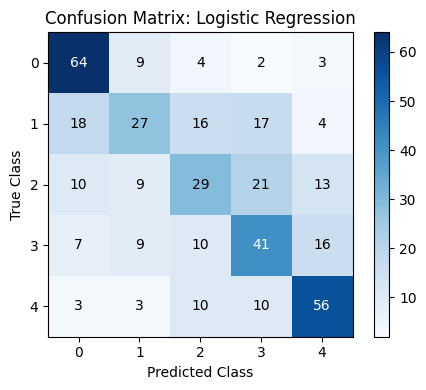

Generating Confusion Matrix for: Random Forest


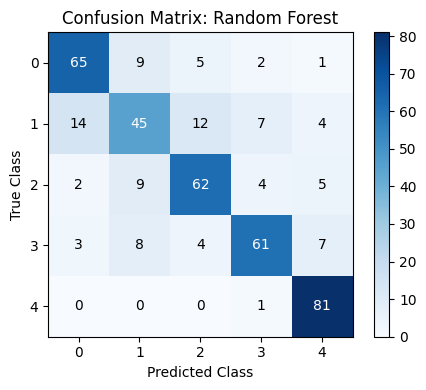

Generating Confusion Matrix for: SVM


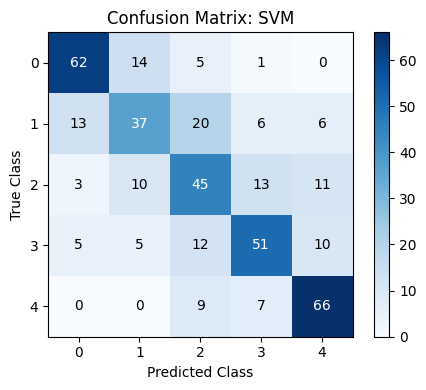

Generating Confusion Matrix for: KNN


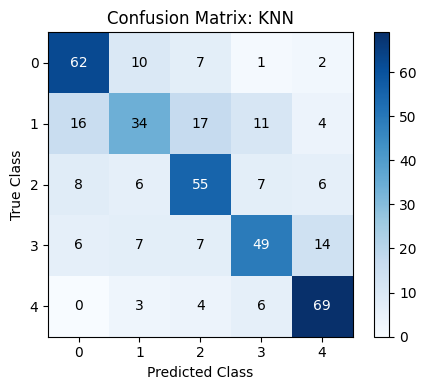

Generating Confusion Matrix for: XGBoost


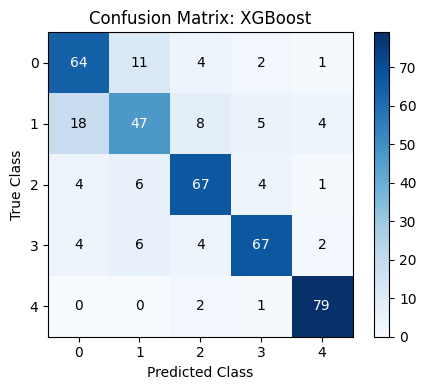

Generating Confusion Matrix for: CatBoost


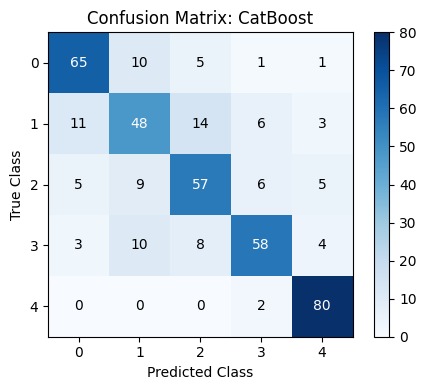

In [16]:
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.colorbar()
    ticks = np.arange(5)
    plt.xticks(ticks, ticks)
    plt.yticks(ticks, ticks)
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")

    # Label values inside grid
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()


# Generate confusion matrix for each model
for model_name, model in models.items():
    print(f"Generating Confusion Matrix for: {model_name}")

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plot_confusion_matrix(cm, model_name)


In [23]:
accuracies = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)

    # evaluate one model at a time -> returns a dictionary like {"Model": accuracy}
    report = evaluate_models({model_name: model}, X_test, y_test)

    accuracies[model_name] = report[model_name]   # <-- report is {name: accuracy}



MODEL: Logistic Regression
Accuracy: 0.5279805352798054
              precision    recall  f1-score   support

           0       0.63      0.78      0.70        82
           1       0.47      0.33      0.39        82
           2       0.42      0.35      0.38        82
           3       0.45      0.49      0.47        83
           4       0.61      0.68      0.64        82

    accuracy                           0.53       411
   macro avg       0.52      0.53      0.52       411
weighted avg       0.52      0.53      0.52       411


MODEL: Random Forest
Accuracy: 0.7639902676399026
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        82
           1       0.63      0.55      0.59        82
           2       0.75      0.76      0.75        82
           3       0.81      0.73      0.77        83
           4       0.83      0.99      0.90        82

    accuracy                           0.76       411
   macro avg       0.76

Accuracy Comparison of all models 

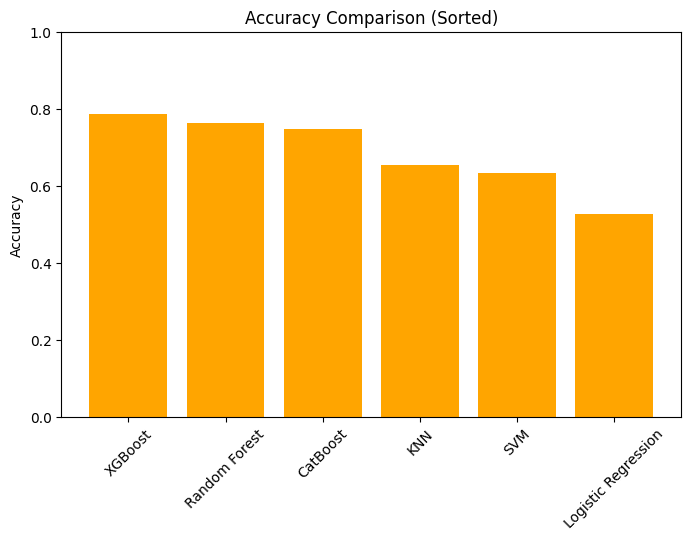

In [25]:
sorted_acc = dict(sorted(accuracies.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(8,5))
plt.bar(sorted_acc.keys(), sorted_acc.values(), color="orange")
plt.title("Accuracy Comparison (Sorted)")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.show()
